Single Attribute Linear Regression: {'Model Type': 'Single Attribute', 'Train MSE': 0.2741915079572271, 'Test MSE': 0.1979546681395589, 'Train RMSE': 0.5236329897525814, 'Test RMSE': 0.44492096841973955, 'Train R²': 0.5834626316505888, 'Test R²': 0.7167580265093751}
Multiple Attribute Linear Regression: {'Model Type': 'Multiple Attributes', 'Train MSE': 0.049039984241604155, 'Test MSE': 0.037233644561975004, 'Train RMSE': 0.22144973299059123, 'Test RMSE': 0.1929602149718304, 'Train R²': 0.9255010261547526, 'Test R²': 0.9467245149351708}


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.4590
Calinski-Harabasz Score: 239.3418
Davies-Bouldin Index: 0.8354


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

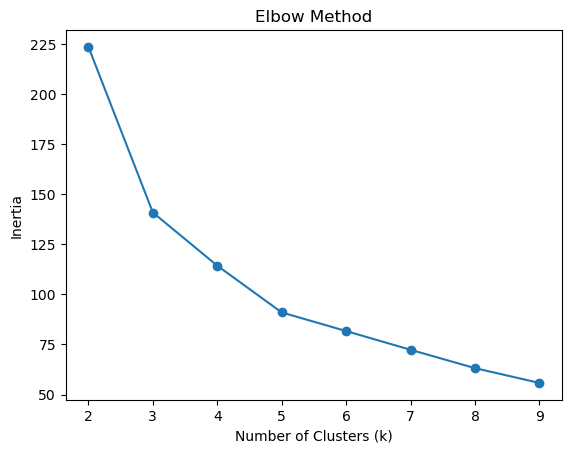

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load dataset
file_path = "iris.csv"
df = pd.read_csv(file_path)

# Encode target variable
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Define features and target
y = df['species']
X = df.drop(columns=['species'])

# Splitting data
X_train_single, X_test_single, y_train, y_test = train_test_split(
    X[['sepal_length']], y, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, _, _ = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model_single = LinearRegression().fit(X_train_single, y_train)
model_multi = LinearRegression().fit(X_train_multi, y_train)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_type):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return {
        "Model Type": model_type,
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    }

# Evaluate models
results_single = evaluate_model(model_single, X_train_single, X_test_single, y_train, y_test, "Single Attribute")
results_multi = evaluate_model(model_multi, X_train_multi, X_test_multi, y_train, y_test, "Multiple Attributes")
print("Single Attribute Linear Regression:", results_single)
print("Multiple Attribute Linear Regression:", results_multi)

# K-Means Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(X_scaled)
labels = kmeans.labels_

# Evaluate K-Means
silhouette = silhouette_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)
db_index = davies_bouldin_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

# Plot K-Means Elbow Method
inertia_values = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
